# a)
I expect that the amount of daylight in December will reach the lowest point of the year, the winter solstice, near Dec 21st or so, because this is the point where the Earth's north pole axis tilt is pointed directly away from the Sun, so latitudes in the Norther Hemisphere experience the least amount of daylight

# b)
I will use the astropy and astroplan astronomy observing packages, which can retrieve sunrise/sunset times for given dates and locations.

In [51]:
from astroplan import Observer
from astropy.time import Time, TimeDelta
from astropy.coordinates import EarthLocation

# Define a time:
time = Time('2019-12-01 00:00:00')
# Make an array of 31 days in December:
times = time + np.arange(0,31,1)*u.day
# Define Tucson location:
tucson = EarthLocation(lat=32.2226*u.deg, lon=-110.9747*u.deg, height=728*u.m)
# Creat observer object:
tuc = Observer(location=tucson, timezone="US/Arizona")
# Get sunrise/sunset times:
sun_rise = tuc.sun_rise_time(times, which="previous")
sun_set = tuc.sun_set_time(times, which="next")
# Convert to local time from UTC:
sun_rise = sun_rise-7*u.hour
sun_set = sun_set-7*u.hour
daylight = (sun_set - sun_rise).to(u.hr)
sunrise, sunset = np.zeros(len(times)),np.zeros(len(times))
dates = np.zeros(len(times))

# Display as a table:
print('Date        Sunrise      Sunset       Length of Daylight')
for i in range(len(times)):
    print(str(times[i]).split(' ')[0],str(sun_rise.iso[i]).split(' ')[1],str(sun_set.iso[i]).split(' ')[1],daylight[i])
    # put into quantities for doing math:
    sunrise[i] = sun_rise.datetime[i].hour + sun_rise.datetime[i].minute*u.min.to(u.hr) + \
                 sun_rise.datetime[i].second*u.s.to(u.hr)
    sunset[i] = sun_set.datetime[i].hour + sun_set.datetime[i].minute*u.min.to(u.hr)+ \
                 sun_set.datetime[i].second*u.s.to(u.hr)
    dates[i] = times.datetime[i].day


Date        Sunrise      Sunset       Length of Daylight
2019-12-01 07:10:26.011 17:14:26.399 10.066774472594258 h
2019-12-02 07:11:17.102 17:14:20.529 10.050951875746247 h
2019-12-03 07:12:07.605 17:14:16.476 10.035797461867329 h
2019-12-04 07:12:57.450 17:14:14.240 10.021330598741766 h
2019-12-05 07:13:46.593 17:14:13.822 10.007563490420576 h
2019-12-06 07:14:34.988 17:14:15.217 9.994507860392329 h
2019-12-07 07:15:22.592 17:14:18.422 9.982174817472693 h
2019-12-08 07:16:09.363 17:14:23.432 9.970574911683794 h
2019-12-09 07:16:55.257 17:14:30.242 9.959718123078343 h
2019-12-10 07:17:40.234 17:14:38.843 9.949613772332665 h
2019-12-11 07:18:24.254 17:14:49.228 9.94027058780193 h
2019-12-12 07:19:07.278 17:15:01.386 9.931696638464924 h
2019-12-13 07:19:49.270 17:15:15.307 9.923899345099922 h
2019-12-14 07:20:30.453 17:15:30.979 9.916812781244513 h
2019-12-15 07:21:10.739 17:15:48.389 9.910458371043202 h
2019-12-16 07:21:49.867 17:16:07.522 9.904904119670388 h
2019-12-17 07:22:27.802 17:

<IPython.core.display.Javascript object>


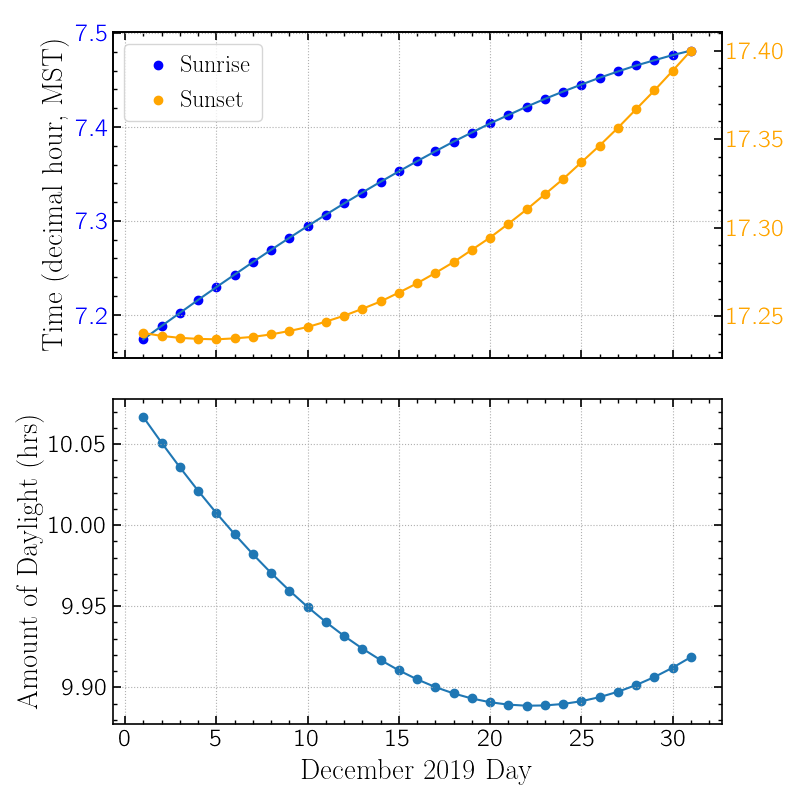

In [53]:
plt.style.use('magrathea')
%matplotlib notebook
fig, (ax1, ax3) = plt.subplots(2,1, figsize = (8,8), sharex=True)
# Sunrise/Sunset vs date:
ax1.plot(dates,sunrise)
sr = ax1.scatter(dates,sunrise,color='blue')
ax1.grid(ls=':')
ax1.set_ylabel('Time (decimal hour, MST)')
ax1.tick_params(axis='y', labelcolor='blue')
ax2 = ax1.twinx()
ax2.plot(dates,sunset, color='orange')
ss = ax2.scatter(dates,sunset, color='orange')
ax2.tick_params(axis='y', labelcolor='orange')
plt.legend([sr, ss], ['Sunrise', 'Sunset'], fontsize = 17)
# Daylight hours vs date:
ax3.plot(dates, daylight)
ax3.scatter(dates, daylight)
ax3.set_ylabel('Amount of Daylight (hrs)')
ax3.set_xlabel('December 2019 Day')
ax3.grid(ls=':')
plt.tight_layout()
plt.show()
plt.savefig('fig1.pdf')

# c)
As I expected, the amount of daylight hours reaches a minimum at Dec 22nd, however the sunrise/sunset times were not as I expected.  I expected the sunrise and sunset times to change direction coincident with the solstice, such that sunrise time would experience a maximum and sunset time a minimum near Dec 22nd.  But this is not what we see - the sunset time minumum is ~Dec 5th, and the latest sunrise time is ~Jan 10th (shown in plot below).

<IPython.core.display.Javascript object>


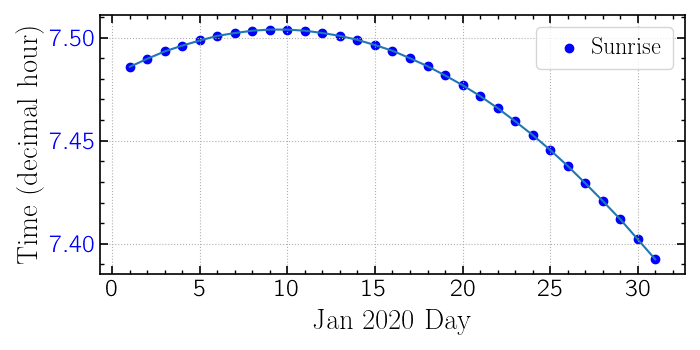

In [54]:
# Define a time:
time = Time('2020-01-01 00:00:00')
# Make an array of 31 days in December:
times = time + np.arange(0,31,1)*u.day
sun_rise = tuc.sun_rise_time(times, which="previous")
sun_set = tuc.sun_set_time(times, which="next")
# Convert to local time from UTC:
sun_rise = sun_rise-7*u.hour
sun_set = sun_set-7*u.hour
daylight = (sun_set - sun_rise).to(u.hr)
sunrise, sunset = np.zeros(len(times)),np.zeros(len(times))
dates = np.zeros(len(times))
for i in range(len(times)):
    sunrise[i] = sun_rise.datetime[i].hour + sun_rise.datetime[i].minute*u.min.to(u.hr) + \
                 sun_rise.datetime[i].second*u.s.to(u.hr)
    sunset[i] = sun_set.datetime[i].hour + sun_set.datetime[i].minute*u.min.to(u.hr)+ \
                 sun_set.datetime[i].second*u.s.to(u.hr)
    dates[i] = times.datetime[i].day


%matplotlib notebook
fig, ax1 = plt.subplots(figsize = (7,3.5))
# Sunrise/Sunset vs date:
ax1.plot(dates,sunrise)
sr = ax1.scatter(dates,sunrise,color='blue')
ax1.grid(ls=':')
ax1.set_ylabel('Time (decimal hour)')
ax1.tick_params(axis='y', labelcolor='blue')
plt.legend([sr], ['Sunrise'], fontsize = 17)
ax1.set_xlabel('Jan 2020 Day')
plt.tight_layout()
plt.show()
plt.savefig('fig2.pdf')

# d)
The closest point of approach of the Earth to the Sun (perihelion) occurred ~ Jan 6th (see plot below).  As the Earth is orbiting the Sun, during the course of a night the Earth's position along its orbit will have advanced a small amount over the course of those hours, so in addition to the sunrise time being affected by the Earth's obliquity, the sunrise time will also be delayed a bit due to having to "catch up" with the change in position of the sun in the sky due to the Earth's advancing on its orbit (similar to why the Moon's rotation is ~27 days, but the length of the phase cycle is ~29 days).  Vice versa for sunset times.  This trend reverses once the Earth passed perihelion and now the sunrise time will be a bit earlier that it would have been if the Earth's orbit were a circle (likewise sunset times).  Thus sunset minimum is a bit before the solstice and sunrise maximum is a bit after solstice and perihelion.

<IPython.core.display.Javascript object>


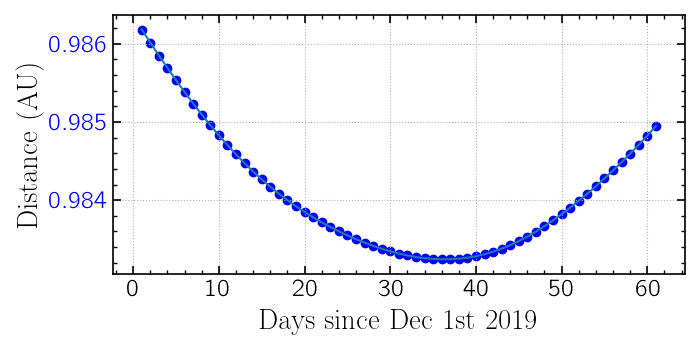

In [55]:
from astropy.coordinates import get_sun
time = Time('2019-12-01 00:00:00')
times = time + np.arange(0,61,1)*u.day
# Retrieve the sun object at these times:
sun = get_sun(times)
dates = np.arange(1,62,1)

%matplotlib notebook
fig, ax1 = plt.subplots(figsize = (7,3.5))
# Plot the distance of the Sun from Earth over time:
ax1.plot(dates,sun.distance)
sr = ax1.scatter(dates,sun.distance,color='blue')
ax1.grid(ls=':')
ax1.set_ylabel('Distance (AU)')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xlabel('Days since Dec 1st 2019')
plt.tight_layout()
plt.show()
plt.savefig('fig3.pdf')

# e)
Plotting distance and finding the location of perihelion, which is beyond what the question asked, helped me understand the cause for the discrepancy from what I had expected.  This would be a helpful thing to ask students to do.